# Actividad 1: Regresión Lineal

In [1]:
# Al inicio, incluímos las librerías pertinentes
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

In [2]:
# Cargamos los datos 
data = fetch_california_housing(as_frame=True)
print(data.feature_names)
print("-"*100)

df = data.frame #obtenemos el dataframe
print(df.head())

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
----------------------------------------------------------------------------------------------------
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [3]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Planteamiento del problema

El objetivo es predecir el valor medio de la vivienda (`MedHouseVal`) utilizando las características disponibles. Se trata de un problema de **regresión supervisada**, ya que contamos con una variable objetivo continua.

### Preparación de los datos

Separamos las características (X) y la variable objetivo (y). Luego, dividimos en conjunto de entrenamiento y prueba.

In [4]:
# 2. Separar características (X) y variable objetivo (y)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

print(f"Dimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")

Dimensiones de X: (20640, 8)
Dimensiones de y: (20640,)


### 3. Selección del modelo

Utilizaremos `LinearRegression` como se indica en el enunciado. Este modelo busca ajustar una relación lineal entre las características y la variable objetivo.

In [ ]:
# 3. Dividir en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(f"Entrenamiento: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Prueba: X_test {X_test.shape}, y_test {y_test.shape}")

Entrenamiento: X_train (16512, 8), y_train (16512,)
Prueba: X_test (4128, 8), y_test (4128,)


In [6]:
# 4. Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 4. Evaluación del modelo

Calculamos las predicciones sobre el conjunto de prueba y evaluamos el rendimiento utilizando las métricas vistas en los apuntes: error cuadrático medio (MSE) y coeficiente de determinación ($R^2$).

In [7]:
# 5. Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

# 6. Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.4f}")
print(f"Coeficiente de determinación (R²): {r2:.4f}")

Error cuadrático medio (MSE): 0.5290
Coeficiente de determinación (R²): 0.5943


### 5. Interpretación de resultados

El $R^2$ indica la proporción de la varianza de la variable objetivo que es explicada por el modelo. Un valor cercano a 1 es deseable. El MSE mide el error promedio de las predicciones; valores más bajos son mejores.

Para completar la actividad, también podemos mostrar algunos coeficientes del modelo para entender la influencia de cada característica.

In [8]:
# 7. Mostrar coeficientes del modelo
coeficientes = pd.DataFrame({
    'Característica': X.columns,
    'Coeficiente': model.coef_
})
print(coeficientes)
print(f"Intercepto: {model.intercept_:.4f}")

  Característica  Coeficiente
0         MedInc     0.433333
1       HouseAge     0.009293
2       AveRooms    -0.098643
3      AveBedrms     0.593215
4     Population    -0.000008
5       AveOccup    -0.004745
6       Latitude    -0.421449
7      Longitude    -0.434166
Intercepto: -36.8586


### 6. Conclusiones

Hemos aplicado un modelo de regresión lineal al conjunto de datos de viviendas de California. El proceso sigue los pasos estándar de aprendizaje automático: preparación de datos, división, entrenamiento y evaluación. Los resultados cuantitativos (MSE y $R^2$) nos permiten juzgar la calidad del modelo.

# Actividad 2: Regresión 1

## Creación del Dataset

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=100, n_informative=6, n_features=6, coef=False,
                       noise=100.0, random_state=33, bias=10.5)

df = pd.DataFrame(X)
df[7] = df[5] * 3   # Característica altamente correlacionada
df[4] = df[4] + df[3] # Otra correlación
df[8] = df[4] / 2   # Correlación lineal

X = df.to_numpy()
print("Primeras filas del dataset:")
print(df.head())

Primeras filas del dataset:
          0         1         2         3         4         5         7  \
0  0.991136  1.630796 -1.900090 -0.111391 -1.232109  0.932722  2.798165   
1 -0.325548 -0.538166 -0.261746 -0.220028  0.109686  0.252768  0.758303   
2  1.937571  0.338847  1.876973  0.217793  0.086090  0.813308  2.439924   
3 -0.960129  0.511255  0.853085 -1.216964 -1.547833 -0.213646 -0.640938   
4 -1.352448 -0.613847 -1.060842 -0.222442  0.307362  0.087174  0.261521   

          8  
0 -0.616054  
1  0.054843  
2  0.043045  
3 -0.773917  
4  0.153681  


## División entrenamiento - validación

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)
print(f"Entrenamiento: {X_train.shape}, Prueba: {X_test.shape}")

Entrenamiento: (80, 8), Prueba: (20, 8)


## Aplicación de Regresión LASSO

In [15]:
lasso = Lasso(alpha=1.0, random_state=0)
lasso.fit(X_train, y_train)

print("Coeficientes Lasso:")
for i, coef in enumerate(lasso.coef_):
    print(f"  Característica {i}: {coef:.4f}")
print(f"Intercepto: {lasso.intercept_:.4f}")

Coeficientes Lasso:
  Característica 0: 1.9317
  Característica 1: 28.2425
  Característica 2: 62.6486
  Característica 3: 70.0714
  Característica 4: 26.3343
  Característica 5: 0.0000
  Característica 6: 23.6077
  Característica 7: 0.0000
Intercepto: 3.6033


## Aplicación de Regresión Lineal

In [16]:
linear = LinearRegression()
linear.fit(X_train, y_train)

print("\nCoeficientes Regresión Lineal:")
for i, coef in enumerate(linear.coef_):
    print(f"  Característica {i}: {coef:.4f}")
print(f"Intercepto: {linear.intercept_:.4f}")


Coeficientes Regresión Lineal:
  Característica 0: 2.9066
  Característica 1: 28.8656
  Característica 2: 63.8653
  Característica 3: 70.8396
  Característica 4: 20.9523
  Característica 5: 7.0900
  Característica 6: 21.2700
  Característica 7: 10.4761
Intercepto: 3.8947


## Comparativa

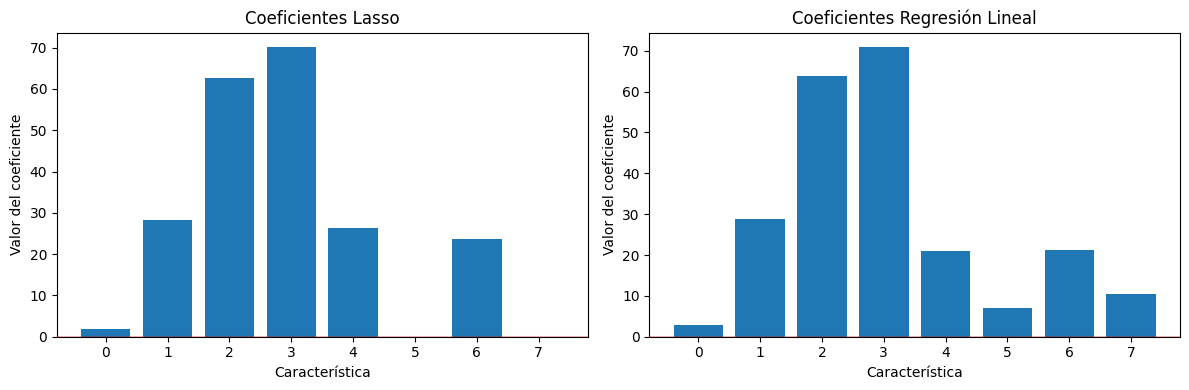


Comparación de métricas en conjunto de prueba:
MSE Lasso: 12361.0925
MSE Lineal: 12368.0063
R² Lasso: 0.5062
R² Lineal: 0.5059


In [17]:
# Visualización de coeficientes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.bar(range(len(lasso.coef_)), lasso.coef_)
ax1.set_xlabel('Característica')
ax1.set_ylabel('Valor del coeficiente')
ax1.set_title('Coeficientes Lasso')
ax1.axhline(y=0, color='r', linestyle='-', alpha=0.3)

ax2.bar(range(len(linear.coef_)), linear.coef_)
ax2.set_xlabel('Característica')
ax2.set_ylabel('Valor del coeficiente')
ax2.set_title('Coeficientes Regresión Lineal')
ax2.axhline(y=0, color='r', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

# Cálculo de métricas
from sklearn.metrics import mean_squared_error, r2_score

y_pred_lasso = lasso.predict(X_test)
y_pred_linear = linear.predict(X_test)

print("\nComparación de métricas en conjunto de prueba:")
print(f"MSE Lasso: {mean_squared_error(y_test, y_pred_lasso):.4f}")
print(f"MSE Lineal: {mean_squared_error(y_test, y_pred_linear):.4f}")
print(f"R² Lasso: {r2_score(y_test, y_pred_lasso):.4f}")
print(f"R² Lineal: {r2_score(y_test, y_pred_linear):.4f}")

## Observaciones

La regresión Lasso tiende a asignar coeficientes cero a características redundantes o poco informativas, mientras que la regresión lineal asigna valores no nulos a todas. Esto demuestra la capacidad de Lasso para realizar selección de características automática.

# Actividad 3: Regresión 2

## Regresión LASSO con selección de hiperparámetro

### Carga y preparación de datos

In [18]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

diabetes = load_diabetes(as_frame=True)
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

### Búsqueda del mejor Alpha

Mejor alpha: 0.215443
Mejor R² en test: 0.3432


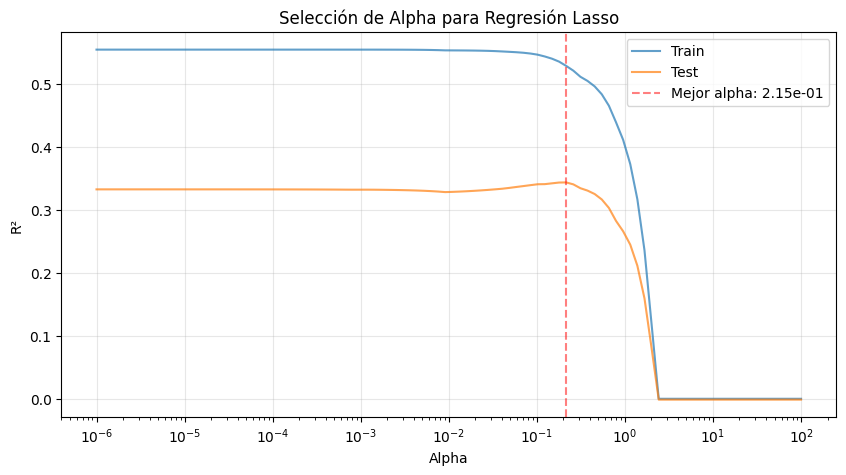

In [19]:
alphas = np.logspace(-6, 2, 100)  # 10^-6 a 10^2
scores_test = []
scores_train = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, random_state=0)
    lasso.fit(X_train, y_train)
    scores_test.append(lasso.score(X_test, y_test))
    scores_train.append(lasso.score(X_train, y_train))

best_idx = np.argmax(scores_test)
best_alpha = alphas[best_idx]
best_score = scores_test[best_idx]

print(f"Mejor alpha: {best_alpha:.6f}")
print(f"Mejor R² en test: {best_score:.4f}")

# Gráfica de selección
plt.figure(figsize=(10, 5))
plt.semilogx(alphas, scores_train, label='Train', alpha=0.7)
plt.semilogx(alphas, scores_test, label='Test', alpha=0.7)
plt.axvline(best_alpha, color='r', linestyle='--', alpha=0.5, label=f'Mejor alpha: {best_alpha:.2e}')
plt.xlabel('Alpha')
plt.ylabel('R²')
plt.title('Selección de Alpha para Regresión Lasso')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Análisis de Residuos

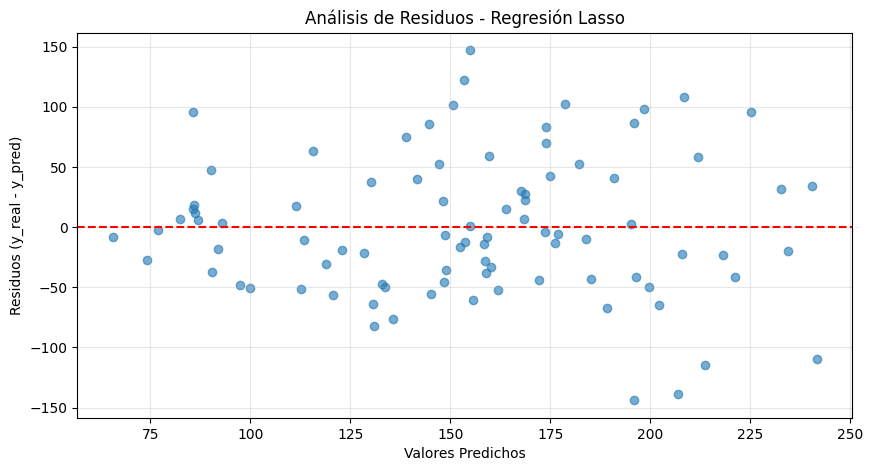

Media de residuos: -0.2795
Desviación estándar de residuos: 58.0325


In [20]:
best_lasso = Lasso(alpha=best_alpha, random_state=0)
best_lasso.fit(X_train, y_train)
y_pred = best_lasso.predict(X_test)
residuos = y_test - y_pred

plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuos, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos (y_real - y_pred)')
plt.title('Análisis de Residuos - Regresión Lasso')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Media de residuos: {np.mean(residuos):.4f}")
print(f"Desviación estándar de residuos: {np.std(residuos):.4f}")

## Regresión Polinómica

### Comparación de grados

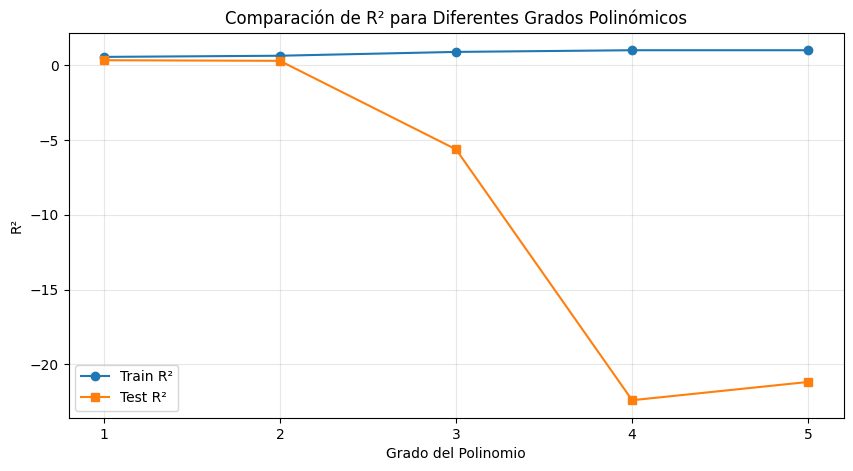

Grado 1: Train R² = 0.5539, Test R² = 0.3322
Grado 2: Train R² = 0.6320, Test R² = 0.2907
Grado 3: Train R² = 0.8870, Test R² = -5.6270
Grado 4: Train R² = 1.0000, Test R² = -22.3942
Grado 5: Train R² = 1.0000, Test R² = -21.1720


In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degrees = range(1, 6)
train_scores = []
test_scores = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    train_scores.append(model.score(X_train_poly, y_train))
    test_scores.append(model.score(X_test_poly, y_test))

# Gráfica de resultados
plt.figure(figsize=(10, 5))
plt.plot(degrees, train_scores, 'o-', label='Train R²')
plt.plot(degrees, test_scores, 's-', label='Test R²')
plt.xlabel('Grado del Polinomio')
plt.ylabel('R²')
plt.title('Comparación de R² para Diferentes Grados Polinómicos')
plt.xticks(degrees)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

for d, train_r2, test_r2 in zip(degrees, train_scores, test_scores):
    print(f"Grado {d}: Train R² = {train_r2:.4f}, Test R² = {test_r2:.4f}")

## Evaluación con división Train / Test

### Análisis de *Overfitting*

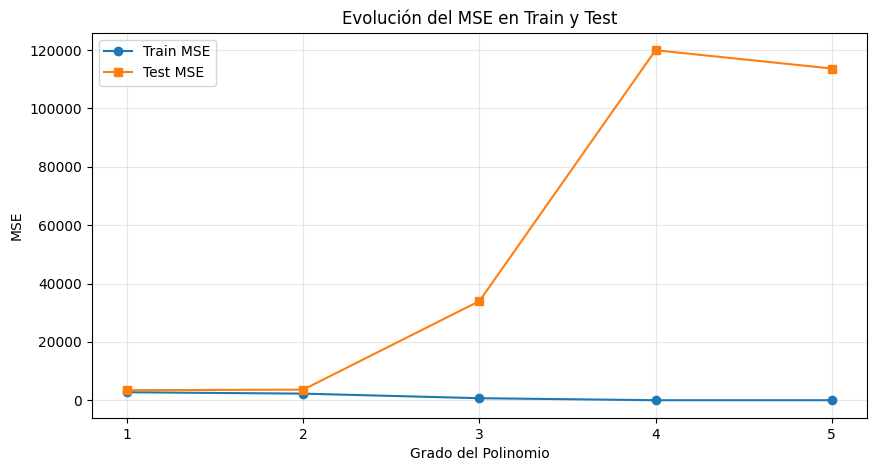


Mejor grado según MSE en test: 1
MSE en train: 2734.7509
MSE en test: 3424.2593


In [22]:
train_mses = []
test_mses = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    train_mses.append(mean_squared_error(y_train, y_train_pred))
    test_mses.append(mean_squared_error(y_test, y_test_pred))

# Gráfica de MSE
plt.figure(figsize=(10, 5))
plt.plot(degrees, train_mses, 'o-', label='Train MSE')
plt.plot(degrees, test_mses, 's-', label='Test MSE')
plt.xlabel('Grado del Polinomio')
plt.ylabel('MSE')
plt.title('Evolución del MSE en Train y Test')
plt.xticks(degrees)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Mejor grado según test MSE
best_degree_idx = np.argmin(test_mses)
best_degree = degrees[best_degree_idx]
print(f"\nMejor grado según MSE en test: {best_degree}")
print(f"MSE en train: {train_mses[best_degree_idx]:.4f}")
print(f"MSE en test: {test_mses[best_degree_idx]:.4f}")

### Interpretación de los resultados

1. Regresión Lasso: El mejor valor de alpha encontrado es ${best_alpha:.2e}$, con un $R^2$ de ${best_score:.4f}$ en test. La distribución de residuos parece aleatoria alrededor de cero, indicando un buen ajuste.

2. Regresión Polinómica:

- Grado 1 (lineal): $R^2$ similar al obtenido con Lasso
- Grados superiores: $R^2$ en train aumenta, pero en test disminuye, indicando overfitting
- El MSE en test es mínimo para el polinomio de grado {best_degree}

3. Comparación final: La regresión Lasso con selección adecuada de alpha proporciona un buen equilibrio entre sesgo y varianza, mientras que los polinomios de alto grado tienden a sobreajustar los datos de entrenamiento.

**Conclusión**: Para este dataset, un modelo lineal regularizado (Lasso) parece más apropiado que modelos polinómicos complejos, que sufren de overfitting.

# Actividad 4: Actividad 5.3

**Objetivo**: Separar el conjunto de datos en entrenamiento y prueba, entrenar un clasificador SVM lineal con regularización C=0.0001, mostrar la matriz de confusión y calcular la precisión.

**Razonamiento**: Utilizaremos los datos sintéticos generados en los apuntes (sección de SVM) y la función `LinearSVC` de scikit-learn. La matriz de confusión se obtiene con `confusion_matrix` y la precisión con `precision_score`.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, precision_score

# Generar datos sintéticos (igual que en los apuntes)
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2,
                           random_state=2023, n_clusters_per_class=1)
rng = np.random.RandomState(2023)
X += 3 * rng.uniform(size=X.shape)

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Entrenar SVM con C=0.0001
model = LinearSVC(C=0.0001, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Precisión
precision = precision_score(y_test, y_pred)
print(f"Precisión: {precision:.4f}")

Matriz de confusión:
[[91  5]
 [66 38]]
Precisión: 0.8837


# Actividad 5: Actividad 5.4

**Objetivo**: Analizar cómo varía el comportamiento del clasificador SVM lineal al modificar el parámetro de regularización C. Se debe completar el código proporcionado para graficar las rectas de separación.

**Razonamiento**: Usaremos el mismo conjunto de datos de la actividad 5.3. El código ya proporcionado itera sobre una lista de valores de C, entrena un modelo `LinearSVC` y grafica la recta de decisión junto con los datos de entrenamiento.

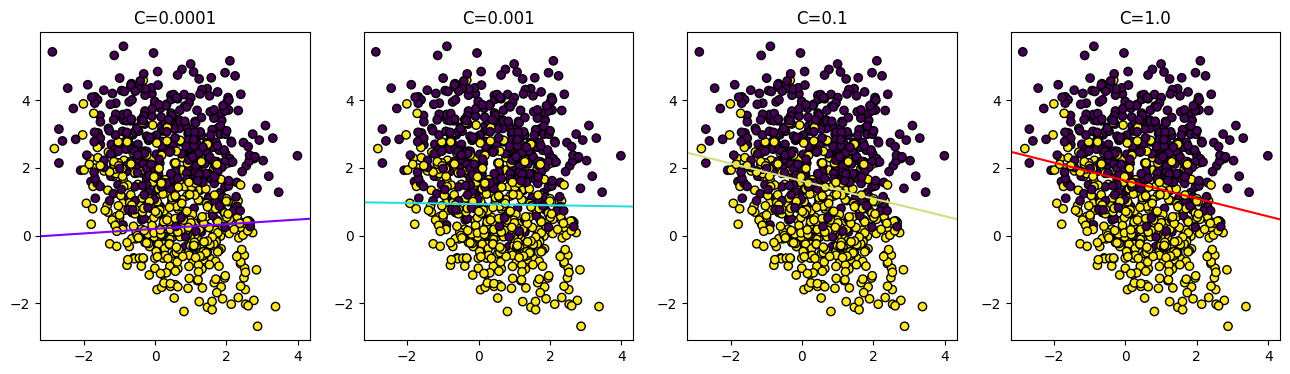

In [24]:
import matplotlib.cm as cm

Cs = [0.0001, 0.001, 0.1, 1.0]
colors = cm.rainbow(np.linspace(0, 1, len(Cs)))

plt.figure(figsize=(16,4))

for idx, C in enumerate(Cs):
    model = LinearSVC(C=C, random_state=0)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)  # No se usa en la gráfica, pero se calcula
    
    # Obtener coeficientes para la línea de decisión (solo para 2 características)
    m = -model.coef_[0][0] / model.coef_[0][1]
    x1 = (0, -model.intercept_[0] / model.coef_[0][1])
    
    ax = plt.subplot(1, 4, idx + 1)
    ax.set_title("C=" + str(C))
    ax.axline(xy1=x1, slope=m, color=colors[idx])
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="k")

plt.show()


# Actividad 6: Actividad 5.5

In [25]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

iris = datasets.load_iris()
X = iris.data[:, :2]  # Solo las dos primeras características
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearSVC(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.67      0.31      0.42        13
           2       0.31      0.67      0.42         6

    accuracy                           0.63        30
   macro avg       0.66      0.66      0.61        30
weighted avg       0.72      0.63      0.63        30



# Actividad 7: Actividad 5.6

**Objetivo**: Utilizar regresión logística para clasificar dígitos manuscritos (dataset Digits). Dividir los datos (70% entrenamiento), entrenar el modelo y analizar la matriz de confusión para identificar qué clases se confunden más.

**Razonamiento**: Cargaremos el dataset Digits, dividiremos en 70% entrenamiento y 30% prueba, entrenaremos un modelo `LogisticRegression` (que por defecto maneja multiclase) y examinaremos la matriz de confusión. Calcularemos también la matriz normalizada por filas para ver el error por clase.

In [26]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np

digits = load_digits()
X = digits.data
Y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

model = LogisticRegression(random_state=0, max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Matriz normalizada por filas (para ver error por clase)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("\nMatriz de confusión normalizada por fila (cada fila suma 1):")
print(cm_normalized)

# Número de errores por clase
errors = cm.sum(axis=1) - np.diag(cm)
for i in range(len(errors)):
    print(f"Clase {i}: {errors[i]} errores")

Matriz de confusión:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0  2  1]
 [ 0  1 50  2  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  1  1]
 [ 0  0  0  0 47  0  0  1  0  0]
 [ 0  0  0  0  0 54  1  0  0  2]
 [ 0  1  0  0  0  0 59  0  0  0]
 [ 0  1  0  1  1  0  0 50  0  0]
 [ 0  3  1  1  0  0  0  0 53  3]
 [ 0  0  0  0  0  1  0  0  1 55]]

Matriz de confusión normalizada por fila (cada fila suma 1):
[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.94230769 0.         0.         0.         0.
  0.         0.         0.03846154 0.01923077]
 [0.         0.01886792 0.94339623 0.03773585 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.96296296 0.         0.
  0.         0.         0.01851852 0.01851852]
 [0.         0.         0.         0.         0.97916667 0.
  0.         0.02083333 0.         0.        ]
 [0.         0.         0.         0.         0.   

# Actividad 8: Actividad 5.7

**Objetivo**: Evaluar la calidad de vehículos mediante un clasificador Random Forest. Cargar el dataset, preparar los datos (codificar variables categóricas), dividir en entrenamiento/prueba, entrenar el modelo y estudiar cómo varía el accuracy al cambiar el número de árboles.

**Razonamiento**: Seguiremos el ejemplo de los apuntes: usaremos `LabelEncoder` para todas las columnas categóricas, dividiremos los datos y entrenaremos `RandomForestClassifier` con diferentes valores de `n_estimators`.

In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

pathFile = "data/car_evaluation.csv"
df = pd.read_csv(pathFile)

# Mostrar información básica
print(df.shape)
print(df.describe())
print(df.head())

# Codificar variables categóricas
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Separar X e y (asumiendo que la última columna es 'class')
X = df.drop('class', axis=1)
y = df['class']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Random Forest con 100 árboles (por defecto)
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy score (n_estimators=100): {accuracy:.4f}")

# Variar el número de árboles
n_estimators_list = [10, 50, 100, 200]
for n in n_estimators_list:
    rfc = RandomForestClassifier(n_estimators=n, random_state=0)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"n_estimators={n}: accuracy = {accuracy:.4f}")

(1727, 7)
       vhigh vhigh.1     2   2.1 small   low  unacc
count   1727    1727  1727  1727  1727  1727   1727
unique     4       4     4     3     3     3      4
top     high    high     3     4   med   med  unacc
freq     432     432   432   576   576   576   1209
   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc


KeyError: "['class'] not found in axis"

# Actividad 9: Actividad 6.1

**Objetivo**: Realizar un estudio comparativo entre K-Means y Spectral Clustering en el dataset "Facebook Live Sellers in Thailand". Cargar y preparar los datos, evaluar el número idóneo de clusters y visualizar los resultados.

**Razonamiento**: Seleccionaremos las columnas numéricas del dataset, eliminaremos filas con valores nulos y aplicaremos ambos algoritmos de clustering. Para K-Means, usaremos el método del codo para elegir el número de clusters. Dado que los datos son multidimensionales, visualizaremos los clusters usando las dos primeras características (aunque esto puede no ser representativo de la estructura global).

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering

# Cargar datos
datafile = "data/Live.csv"
df = pd.read_csv(datafile)

# Explorar
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:")
print(df.head())

# Seleccionar columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

# Eliminar filas con valores nulos
df_numeric = df_numeric.dropna()
X = df_numeric.values

print(f"\nSe usaron {X.shape[1]} características numéricas.")

# Método del codo para K-Means
distortions = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.figure()
plt.plot(K_range, distortions, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo para K-Means')
plt.show()

# Elegir un k (por ejemplo, k=3, donde se observa un codo)
k_opt = 3

# K-Means con k óptimo
kmeans = KMeans(n_clusters=k_opt, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

# Spectral Clustering con el mismo k
spectral = SpectralClustering(n_clusters=k_opt, assign_labels='discretize', random_state=0)
spectral_labels = spectral.fit_predict(X)

# Visualizar usando las dos primeras características (si existen)
if X.shape[1] >= 2:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
    plt.title('K-Means Clusters')
    plt.subplot(1, 2, 2)
    plt.scatter(X[:, 0], X[:, 1], c=spectral_labels, cmap='viridis')
    plt.title('Spectral Clustering')
    plt.show()
else:
    print("No hay suficientes características para visualizar en 2D.")

# Interpretación: centroides de K-Means
centroids = kmeans.cluster_centers_
print("\nCentroides de K-Means (primeras 5 características):")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: {centroid[:5]}")


FileNotFoundError: [Errno 2] No such file or directory: 'data/Live.csv'

**Interpretación**: Los clusters obtenidos representan grupos de publicaciones (o vendedores) con comportamientos similares en términos de las características numéricas (por ejemplo, número de reacciones, comentarios, compartidas, etc.). Un análisis detallado requeriría examinar los centroides en relación con los nombres de las columnas originales.